In [1]:
import numpy as np
from ase.io.trajectory import Trajectory
from ase.visualize import view
from glob import glob
sys.path.append('/media/rbnfiles/ruco/repos/atomistic-analysis/src')
from opendata import data

class data:
    def __init__(self):
        self.path  = "/media/rbnfiles/dft/pts2/"
        self.folders = []
        self.files = []
        self.complete_folders= []
        self.complete_files = []
        for folder in glob(self.path+"*"):
            self.folders.append(folder.split('/')[-1])
            self.complete_folders.append(folder)
        for folder in  self.complete_folders:
            for filesinto in glob(folder+'/*.traj'):
                self.complete_files.append(filesinto)

    def get_list_samples(self,folder):
        npath = self.path+'/'+folder
        print(folder)
        self.folder_samples=[]
        for folderi in self.complete_folders:
            if folder in folderi:
                for filesinto in glob(folderi+'/*.traj'):
                    self.folder_samples.append(filesinto.split(self.path)[-1].split('/')[-1])
        return self.folder_samples


    def return_data(self,file):
        for files in self.complete_files:
            if file in files:
                self.select_file = file
                break
        return self.select_file
data().folders

['2x2supercellPtS2', '3x3supercellPtS2', 'teststruct']

<AxesSubplot:>

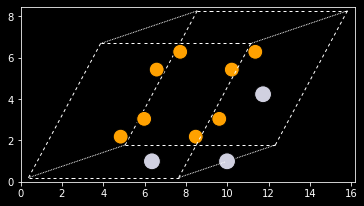

In [2]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from ase.visualize.plot import plot_atoms
from ase.spacegroup import crystal
from ase.gui.view import get_cell_coordinates

folders = data().complete_folders
allfiles = data().complete_files
file = data().return_data(allfiles[0])
traj = Trajectory(file)[-1]
fig,ax = plt.subplots(1,1)
plot_atoms(traj,ax,radii=0.3,rotation=('175x,15y,180z'))



In [5]:
f = data().folders[0]
data().get_list_samples(f)


2x2supercellPtS2


['PtSe2_2x2SupvacancyPt.traj',
 'Opt_PtSe2_VacPt.traj',
 'VacPt_Opt_PtS2.traj',
 'uCellPtS2.traj',
 'Opt_PtS2_VacPt_PW.traj',
 'PtS2_2x2SupvacancyPt.traj',
 'Opt_PtS2_VacPt.traj',
 'PtS2_VacPt_magn.traj']

In [4]:
from pymatgen.core import Molecule
import pymatgen.io.ase as pyase 
from pymatgen.io.ase import AseAtomsAdaptor
atoms = pyase.Atoms(traj)

structure = AseAtomsAdaptor.get_structure(atoms)
structure

Structure Summary
Lattice
    abc : 7.52 7.52 18.127
 angles : 90.0 90.0 120.00000000000001
 volume : 887.7532024353469
      A : 7.52 0.0 0.0
      B : -3.76 6.512511036458978 0.0
      C : 0.0 -0.0 18.127
    pbc : True True True
PeriodicSite: Pt (0.0000, 0.0000, 9.0635) [0.0000, 0.0000, 0.5000]
PeriodicSite: Se (1.8800, 1.0854, 10.3333) [0.3333, 0.1667, 0.5700]
PeriodicSite: Se (-0.0000, 2.1708, 7.7937) [0.1667, 0.3333, 0.4300]
PeriodicSite: Pt (-1.8800, 3.2563, 9.0635) [0.0000, 0.5000, 0.5000]
PeriodicSite: Se (-0.0000, 4.3417, 10.3333) [0.3333, 0.6667, 0.5700]
PeriodicSite: Se (-1.8800, 5.4271, 7.7937) [0.1667, 0.8333, 0.4300]
PeriodicSite: Pt (3.7600, 0.0000, 9.0635) [0.5000, 0.0000, 0.5000]
PeriodicSite: Se (5.6400, 1.0854, 10.3333) [0.8333, 0.1667, 0.5700]
PeriodicSite: Se (3.7600, 2.1708, 7.7937) [0.6667, 0.3333, 0.4300]
PeriodicSite: Se (3.7600, 4.3417, 10.3333) [0.8333, 0.6667, 0.5700]
PeriodicSite: Se (1.8800, 5.4271, 7.7937) [0.6667, 0.8333, 0.4300]

In [6]:

def unit_cell_3d(a, b, c, atom_pos, Nx, Ny, Nz):
    """Make arrays of x-, y- and z-positions of a lattice from the
    lattice vectors, the atom positions and the number of unit cells.
    
    Parameters:
    -----------
    a : list
        First lattice vector
    b : list
        Second lattice vector
    c : list
        Third lattice vector
    atom_pos : list
        Positions of atoms in the unit cells in terms of a, b and c
    Nx : int
        number of unit cells in the x-direction to be plotted
    Ny : int
        number of unit cells in the y-direction to be plotted
    Nz : int
        number of unit cells in the z-direction to be plotted
        
    Returns:
    --------
    latt_coord_x : numpy.ndarray
        Array containing the x-coordinates of all atoms to be plotted
    latt_coord_y : numpy.ndarray
        Array containing the y-coordinates of all atoms to be plotted
    latt_coord_z : numpy.ndarray
        Array containing the z-coordinates of all atoms to be plotted
    """
    latt_coord_x = []
    latt_coord_y = []
    latt_coord_z = []
    for atom in atom_pos:
        xpos = atom[0]*a[0] + atom[1]*b[0] + atom[2]*c[0]
        ypos = atom[0]*a[1] + atom[1]*b[1] + atom[2]*c[1]
        zpos = atom[0]*a[2] + atom[1]*b[2] + atom[2]*c[2]
        xpos_all = [xpos + n*a[0] + m*b[0] + k*c[0] for n, m, k in
                     product(range(Nx), range(Ny), range(Nz))]
        ypos_all = [ypos + n*a[1] + m*b[1] + k*c[1] for n, m, k in
                     product(range(Nx), range(Ny), range(Nz))]
        zpos_all = [zpos + n*a[2] + m*b[2] + k*c[2] for n, m, k in
                     product(range(Nx), range(Ny), range(Nz))]
        latt_coord_x.append(xpos_all)
        latt_coord_y.append(ypos_all)
        latt_coord_z.append(zpos_all)
    latt_coord_x = np.array(latt_coord_x).flatten()
    latt_coord_y = np.array(latt_coord_y).flatten()
    latt_coord_z = np.array(latt_coord_z).flatten()
    return latt_coord_x, latt_coord_y, latt_coord_z



In [22]:
from itertools import product
import plotly.graph_objs as go

from plotly.offline import init_notebook_mode, iplot, iplot_mpl

# FCC lattice

# Lattice vectors
a = atoms.get_cell()[0]
b = atoms.get_cell()[1]
c =atoms.get_cell()[2]


# Atom positions expressed in units of a, b, and c
atom_pos =atoms.positions

# Number of unit cells to be plotted in x-, y- and z-direction
Nx = 1
Ny = 1
Nz = 1

# Find the coordinates!
latt_x, latt_y, latt_z = unit_cell_3d(a, b, c, atom_pos, Nx, Ny, Nz)
# Plot the coordinates as a scatter plot
trace = go.Scatter3d(x = latt_x, y = latt_y, z=latt_z, mode = 'markers',
                    marker = dict(size = 9, color = 'rgba(0, 0, 0, .5)',
                    line = dict(width = 2, color = 'rgb(0, 0, 0)')),
)
iplot([trace], show_link=False)

In [19]:
atoms.positions

array([[ 1.99309072e-30,  4.91053796e-17,  9.06350000e+00],
       [ 1.88000000e+00,  1.08541851e+00,  1.03332848e+01],
       [ 1.00097322e-18,  2.17083701e+00,  7.79371520e+00],
       [-1.88000000e+00,  3.25625552e+00,  9.06350000e+00],
       [ 0.00000000e+00,  4.34167402e+00,  1.03332848e+01],
       [-1.88000000e+00,  5.42709253e+00,  7.79371520e+00],
       [ 3.76000000e+00,  4.91053796e-17,  9.06350000e+00],
       [ 5.64000000e+00,  1.08541851e+00,  1.03332848e+01],
       [ 3.76000000e+00,  2.17083701e+00,  7.79371520e+00],
       [ 3.76000000e+00,  4.34167402e+00,  1.03332848e+01],
       [ 1.88000000e+00,  5.42709253e+00,  7.79371520e+00]])

# Trajectories 

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from ase.visualize.plot import plot_atoms
from ase.spacegroup import crystal
from ase.gui.view import get_cell_coordinates

ncols = 4
nrows=(len(files)/ncols) if isinstance(len(files)/ncols, int)==False else int((len(files)/ncols)+1)
nrows=int(nrows)

cm = 1/2.54
px = 1/plt.rcParams['figure.dpi']  # pixel in inches

fig, ax = plt.subplots(nrows,ncols,figsize=(15,7))

count=0
for i in range(nrows):
    for j in range(ncols):
        if count < len(files):
            traj = Trajectory(files[count])[-1]
            plot_atoms(traj,ax[i,j],radii=0.3,rotation=('175x,15y,180z'))
            count+=1
        else:
            fig.delaxes(ax[i,j])
            break
fig.tight_layout()

plt.show()  

In [ ]:
from ase.gui.view import get_cell_coordinates, get_bonds
from ase.gui.view import View

atoms=  Trajectory(files[count])[-1]
bondatoms = []
symbols = atoms.get_chemical_symbols()

for i in range(len(atoms)):
    for j in range(i):
        if (symbols[i] == symbols[j] == 'Pt' and
                atoms.get_distance(i, j) < 4.53):
            bondatoms.append((i, j))
        elif (symbols[i] == symbols[j] == 'S' and
              atoms.get_distance(i, j) < 2.99):
            bondatoms.append((i, j))

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(projection='3d')


ax.scatter(atoms.positions[:,0],atoms.positions[:,1],atoms.positions[:,2],marker="o", s=22**2)
ax.plot(atoms.positions[0,0],atoms.positions[1,0],lw=10)


In [ ]:
fig, ax = plt.subplots(1,1,figsize=(12,12))
plt.subplots_adjust(wspace=0, hspace=0)

natoms=Trajectory(files[0])[-1]
plot_atoms(natoms,ax,radii=0.3,rotation=('0x,0y,180z'))
ax.plot([0,0,0],[1,1,1])

plt.show()

In [ ]:
from ase.cell import Cell
from  ase.geometry.analysis import Analysis

fig,ax = plt.subplots(1,1,figsize=(10,10))
ax.imshow(atoms.get_all_distances())